### Time series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from datetime import datetime
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm



In [2]:
bakery_temp = pd.read_pickle('Data/bakery_temp_dataframe.pkl')

In [3]:
bakery_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20506 entries, 0 to 20505
Data columns (total 18 columns):
Date           20506 non-null object
Time           20506 non-null object
Transaction    20506 non-null int64
Item           20506 non-null object
Date_Time      20506 non-null datetime64[ns]
Day_of_Week    20506 non-null object
Month          20506 non-null int64
Month_Order    20506 non-null int64
Season         20506 non-null object
Hour           20506 non-null int64
Session        20506 non-null object
Category       20506 non-null object
Hourly         20506 non-null datetime64[ns]
Monthly        20506 non-null object
Weekly         20506 non-null object
Unnamed: 0     20506 non-null float64
time           20506 non-null float64
temperature    20506 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(4), object(9)
memory usage: 3.0+ MB


In [4]:
#Extract dates as we want then to be the index
dates = pd.DatetimeIndex(bakery_temp['Date_Time'])

In [5]:
#Create new dataset with only item and date 
bakery = pd.DataFrame(bakery_temp.Item.values, columns=['Item'], index=dates)

In [6]:
bakery.head(2)

,Item
Date_Time,
2016-10-30 09:58:11,Bread
2016-10-30 10:05:34,Scandinavian


In [7]:
bakery_daily = bakery.resample('D').count()

In [8]:
bakery_daily.head(2)

,Item
Date_Time,
2016-10-30,170
2016-10-31,199


In [9]:
bakery_daily[bakery_daily['Item'] == 1] 

,Item
Date_Time,
2017-01-01,1


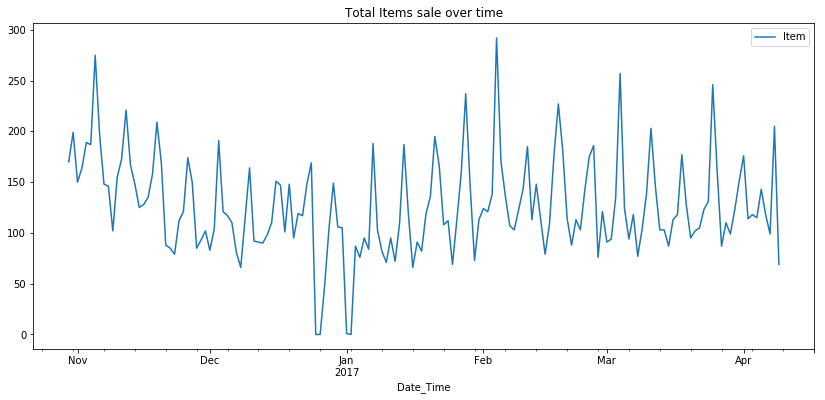

In [10]:
bakery_daily.plot(figsize=(14, 6), title="Total Items sale over time");

In [11]:
bakery_daily_to = pd.DataFrame(bakery_daily.Item.values, columns=['Item'])

In [12]:
bakery_daily_to['Date'] = bakery_daily.index

In [13]:
train = bakery_daily['2016-10-30':'2017-03-07'] # 3 month
test = bakery_daily['2017-03-8':'2017-04-9'] # 1 month


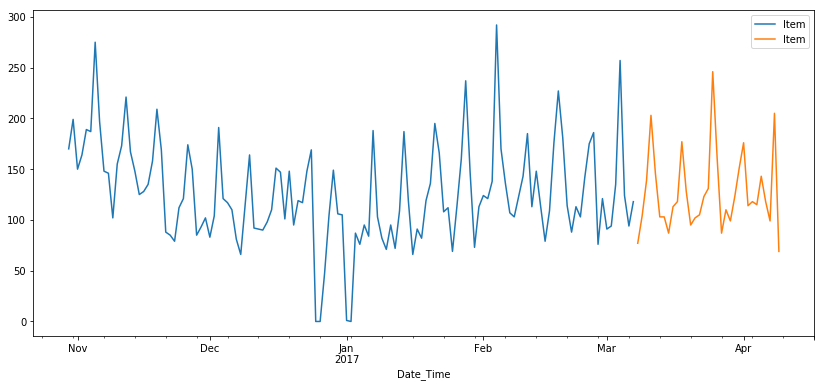

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
ax.legend()

plt.show()

In [15]:
bakery_daily.tail(1)

,Item
Date_Time,
2017-04-09,69


### Model in original form

In [16]:
model = sm.tsa.SARIMAX(train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0)).fit()
y_pred = model.predict(start='2017-03-08', end='2017-04-09')

#the last number in order is for the normal QQ
#seosanal order the last one is the periods of sesonality

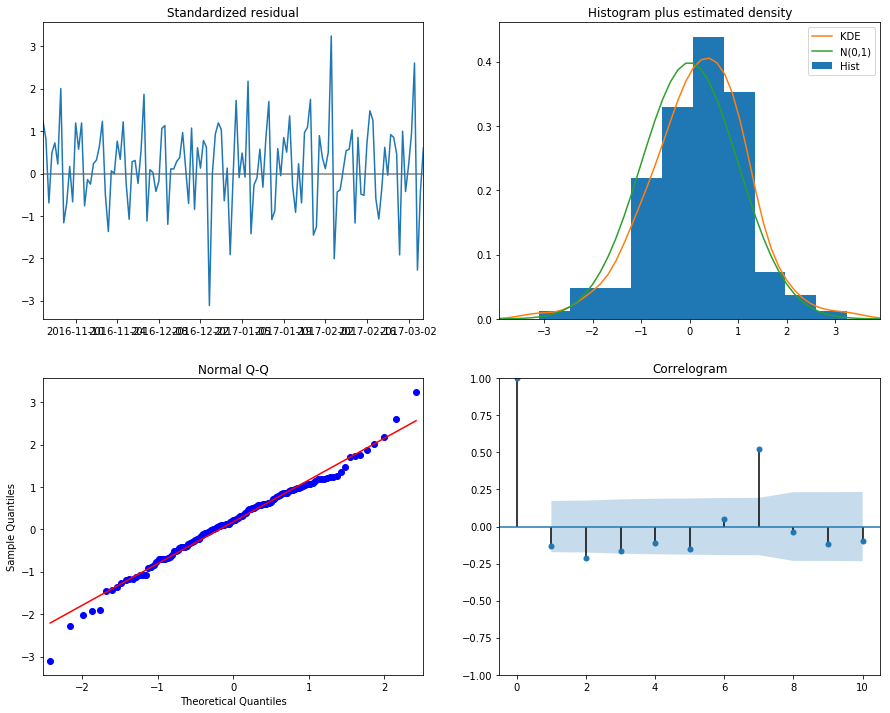

In [17]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

### Stationary  time series

In [18]:
import statsmodels.api as sm

model = sm.tsa.SARIMAX(train, order=(1, 1, 6), seasonal_order=(2, 1, 2, 7)).fit()
y_pred = model.predict(start='2017-03-08', end='2017-04-09')

#the last number in order is for the normal QQ
#seosanal order the last one is the periods of sesonality

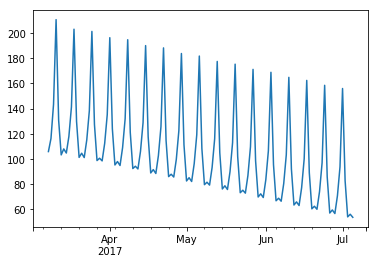

In [38]:
model.forecast(120).plot()

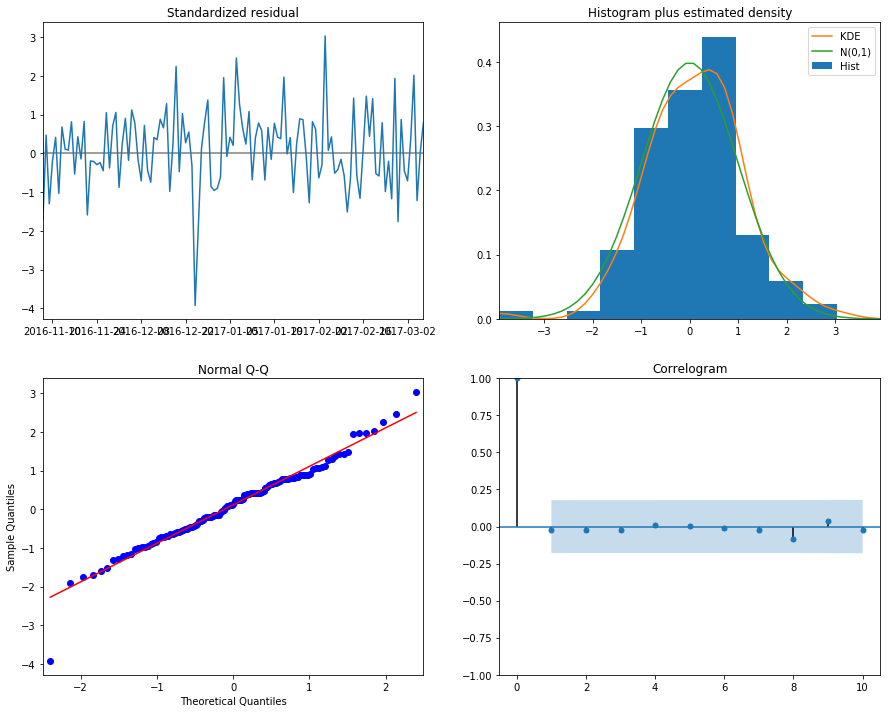

In [19]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [20]:
bakery_daily['2017-04']

,Item
Date_Time,
2017-04-01,176
2017-04-02,114
2017-04-03,118
2017-04-04,115
2017-04-05,143
2017-04-06,118
2017-04-07,99
2017-04-08,205
2017-04-09,69


### Result in graph

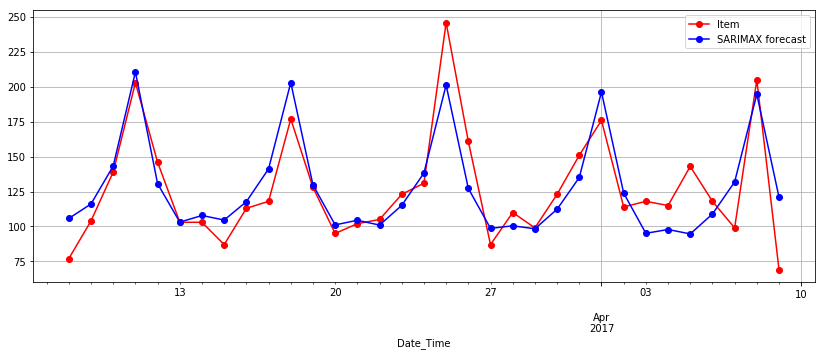

In [21]:
fig, ax = plt.subplots(figsize=(14, 5))

#train.plot(ax=ax, label="train")
test.plot(ax=ax, label='Actual', style='-or')
y_pred.plot(ax=ax, label='SARIMAX forecast', style='-ob', grid=True)
ax.legend()

plt.show()

In [22]:
y_pred

2017-03-08    105.750606
2017-03-09    116.136132
2017-03-10    143.296646
2017-03-11    210.683886
2017-03-12    130.619997
2017-03-13    103.107200
2017-03-14    107.860890
2017-03-15    104.593551
2017-03-16    117.758646
2017-03-17    141.272555
2017-03-18    203.079231
2017-03-19    129.737486
2017-03-20    101.121960
2017-03-21    104.441695
2017-03-22    100.990260
2017-03-23    115.101751
2017-03-24    138.260607
2017-03-25    201.311280
2017-03-26    127.275184
2017-03-27     98.614523
2017-03-28    100.465652
2017-03-29     98.353995
2017-03-30    112.317530
2017-03-31    135.101186
2017-04-01    196.331542
2017-04-02    123.899244
2017-04-03     95.098304
2017-04-04     97.821987
2017-04-05     94.671266
2017-04-06    108.899478
2017-04-07    131.908596
2017-04-08    194.713104
2017-04-09    120.959023
Freq: D, dtype: float64

In [23]:
y_pred_train = model.predict(start='2016-10-30', end='2017-03-07')


y_pred_mean_train = [train.mean()] * len(train)
#errors, rmse, larger because of the outliners
print('MAE Train:', metrics.mean_absolute_error(train, y_pred_train))
print('MSE Train:', metrics.mean_squared_error(train, y_pred_train))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train, y_pred_train)))
print('RMSE: (baseline model):', np.sqrt(metrics.mean_squared_error(train, y_pred_train)))

MAE Train: 27.2966886416246
MSE Train: 1458.195025177128
RMSE Train: 38.186319869517774
RMSE: (baseline model): 38.186319869517774


In [24]:
y_pred_mean = [test.mean()] * len(test)
#errors, rmse, larger because of the outliners
print('MAE Test:', metrics.mean_absolute_error(test, y_pred))
print('MSE Test:', metrics.mean_squared_error(test, y_pred))
print('RMSE SARIMAX:', np.sqrt(metrics.mean_squared_error(test, y_pred)))
print('RMSE Baseline model:', np.sqrt(metrics.mean_squared_error(test, y_pred_mean)))

MAE Test: 15.881001356701628
MSE Test: 436.6252542039108
RMSE SARIMAX: 20.89557977668748
RMSE Baseline model: 38.51435280386815


In [25]:
bakery_daily.head(1)

,Item
Date_Time,
2016-10-30,170


In [26]:
pred = model.get_prediction(start=pd.to_datetime('2016-10-30'), dynamic=False)
pred_ci = pred.conf_int()

In [27]:
Results_Predictions = pd.read_pickle('Data/results_pred_test.pkl')

In [28]:
results_pred_time_series = pd.DataFrame(data=y_pred, columns=['SARIMAX'])

In [29]:
Results_Predictions['SAMIRAX'] = y_pred

In [30]:
Results_Predictions.sort_index()

,Actual,LR_Pred,LR_log_Pred,Lasso_Pred,Ridge_Pred,SAMIRAX
Date_Time,,,,,,
2016-11-08,146,101.444444,98.776649,108.611111,101.444444,NaN
2016-11-11,173,132.799583,130.719711,126.571666,132.799583,NaN
2016-11-14,148,113.337917,109.290270,112.269152,113.337917,NaN
2016-11-15,125,101.444444,98.776649,108.611111,101.444444,NaN
2016-11-17,135,111.777778,108.651329,112.269152,111.777778,NaN
2016-11-18,158,132.799583,130.719711,126.571666,132.799583,NaN
2016-11-23,79,101.823529,99.215595,112.269152,101.823529,NaN
2016-11-28,85,113.337917,109.290270,112.269152,113.337917,NaN
2016-11-29,93,101.444444,98.776649,108.611111,101.444444,NaN


In [31]:
results_pred_time_series.to_pickle('Data/results_pred_time_series.pkl')

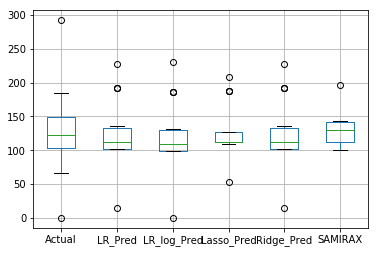

In [32]:
Results_Predictions.boxplot()

In [33]:
Results_Predictions.columns

Index(['Actual', 'LR_Pred', 'LR_log_Pred', 'Lasso_Pred', 'Ridge_Pred',
       'SAMIRAX'],
      dtype='object')

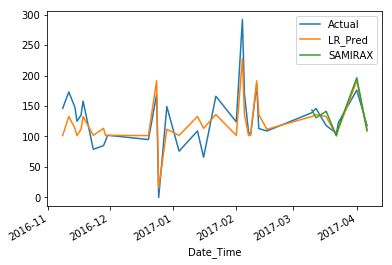

In [34]:
Results_Predictions[['Actual', 'LR_Pred','SAMIRAX']].plot()